In [ ]:
import pandas as pd

try:
    # Assuming the file is in the root of your Google Drive
    df = pd.read_csv('train.csv')
    print("train.csv loaded successfully.")
    print(df.head())
except FileNotFoundError:
    print("Error: train.csv not found. Please make sure the file is in the correct directory in your Google Drive.")
    df = None # Ensure df is None if file not found

train.csv loaded successfully.
   sample_id                                    catalog_content  \
0      33127  Item Name: La Victoria Green Taco Sauce Mild, ...   
1     198967  Item Name: Salerno Cookies, The Original Butte...   
2     261251  Item Name: Bear Creek Hearty Soup Bowl, Creamy...   
3      55858  Item Name: Judee’s Blue Cheese Powder 11.25 oz...   
4     292686  Item Name: kedem Sherry Cooking Wine, 12.7 Oun...   

                                          image_link  price  
0  https://m.media-amazon.com/images/I/51mo8htwTH...   4.89  
1  https://m.media-amazon.com/images/I/71YtriIHAA...  13.12  
2  https://m.media-amazon.com/images/I/51+PFEe-w-...   1.97  
3  https://m.media-amazon.com/images/I/41mu0HAToD...  30.34  
4  https://m.media-amazon.com/images/I/41sA037+Qv...  66.49  


In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 60.3 MB/s eta 0:00:00


In [ ]:
import numpy as np

sample_id          0
catalog_content    0
image_link         0
price              0
dtype: int64
           sample_id         price
count   75000.000000  75000.000000
mean   149841.917707     23.647654
std     86585.346513     33.376932
min         0.000000      0.130000
25%     73845.750000      6.795000
50%    150129.000000     14.000000
75%    225040.250000     28.625000
max    299438.000000   2796.000000


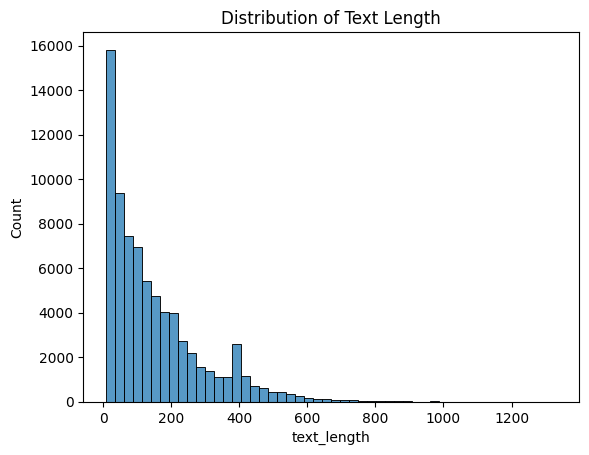

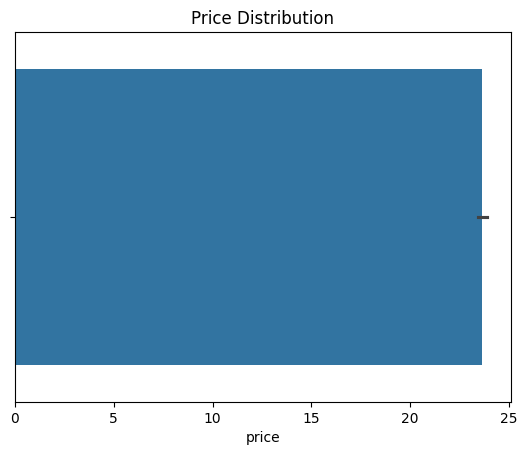


Sample 1:
Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)
Value: 72.0
Unit: Fl Oz


Sample 2:
Item Name: Salerno Cookies, The Original Butter Cookies, 8 Ounce (Pack of 4)
Bullet Point 1: Original Butter Cookies: Classic butter cookies made with real butter
Bullet Point 2: Variety Pack: Includes 4 boxes with 32 cookies total
Bullet Point 3: Occasion Perfect: Delicious cookies for birthdays, weddings, anniversaries
Bullet Point 4: Shareable Treats: Fun to give and enjoy with friends and family
Bullet Point 5: Salerno Brand: Trusted brand of delicious butter cookies since 1925
Value: 32.0
Unit: Ounce


Sample 3:
Item Name: Bear Creek Hearty Soup Bowl, Creamy Chicken with Rice, 1.9 Ounce (Pack of 6)
Bullet Point 1: Loaded with hearty long grain wild rice and vegetables
Bullet Point 2: Full of hearty goodness
Bullet Point 3: Single serve bowls
Bullet Point 4: Easy to prepare mix
Bullet Point 5: 0 grams trans fat
Value: 11.4
Unit: Ounce



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic checks
print(df.isnull().sum())
print(df.describe())

# Text length
df['text_length'] = df['catalog_content'].apply(lambda x: len(x.split()))
sns.histplot(df['text_length'], bins=50)
plt.title("Distribution of Text Length")
plt.show()

# Price distribution
sns.barplot(x=df['price'])
plt.title("Price Distribution")
plt.show()

# Example samples
for i in range(3):
    print(f"\nSample {i+1}:\n{df['catalog_content'][i]}")


In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9 ]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

df["clean"] = df["catalog_content"].astype(str).apply(clean_text)
clean_texts = df["clean"].tolist()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(clean_texts)

print("BoW shape:", X_bow.shape)

BoW shape: (75000, 58243)


In [ ]:
ngram_vectorizer = CountVectorizer(ngram_range=(1,2))
X_ngram = ngram_vectorizer.fit_transform(clean_texts)

print("N-gram shape:", X_ngram.shape)

N-gram shape: (75000, 1135119)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(clean_texts)

print("TF-IDF shape:", X_tfidf.shape)

TF-IDF shape: (75000, 58243)


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

tokenized = [word_tokenize(text) for text in clean_texts]

w2v_model = Word2Vec(
    tokenized,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4
)


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2025-11-16 12:21:18--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-11-16 12:21:18--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-11-16 12:21:18--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip glove.6B.zip


Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
glove_path = "glove.6B.100d.txt"

glove = {}
with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        glove[word] = vector

def get_glove_vector(tokens):
    vectors = [glove[w] for w in tokens if w in glove]
    if len(vectors) == 0:
        return np.zeros(100)
    return np.mean(vectors, axis=0)

X_glove = np.array([get_glove_vector(t) for t in tokenized])

print("GloVe shape:", X_glove.shape)

GloVe shape: (75000, 100)


In [ ]:
from sklearn.cluster import KMeans

k = 3   # you can adjust later
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)

print("Sample cluster labels:", clusters[:20])


Sample cluster labels: [2 2 2 0 2 2 0 0 2 0 2 2 0 2 2 2 2 2 0 0]


In [ ]:
df.columns


Index(['sample_id', 'catalog_content', 'image_link', 'price', 'text_length',
       'clean', 'cluster'],
      dtype='object')

In [ ]:
df['cluster'] = clusters
df[['clean', 'cluster']].head()



,clean,cluster
0,item name la victoria green taco sauce mild 12...,2
1,item name salerno cookies the original butter ...,2
2,item name bear creek hearty soup bowl creamy c...,2
3,item name judee s blue cheese powder 11 25 oz ...,0
4,item name kedem sherry cooking wine 12 7 ounce...,2


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=2000)
X_tfidf = tfidf.fit_transform(clean_texts)

print("TF-IDF shape:", X_tfidf.shape)


TF-IDF shape: (75000, 2000)


In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

n_samples = X_tfidf.shape[0]   # number of rows

idx = np.random.choice(n_samples, 2000, replace=False)

score = silhouette_score(X_tfidf[idx].toarray(), clusters[idx])
print("Silhouette Score:", score)


Silhouette Score: 0.010890351238884372
